# TP 2

## Objectifs
- Interroger des sources de données externes
- Analyses de données

### Exercices
1.  Interrogation de sources de données externes (API)
2.  Effectuer des analyses de données classiques


Dans cet exercice, nous examinerons comment télécharger des données à partir
des sources de données externes utilisant des interfaces d'interrogation spéciales. Par exemple, les données ci-dessus ont été obtenues à partir de [Wikidata query](https://query.wikidata.org/) 

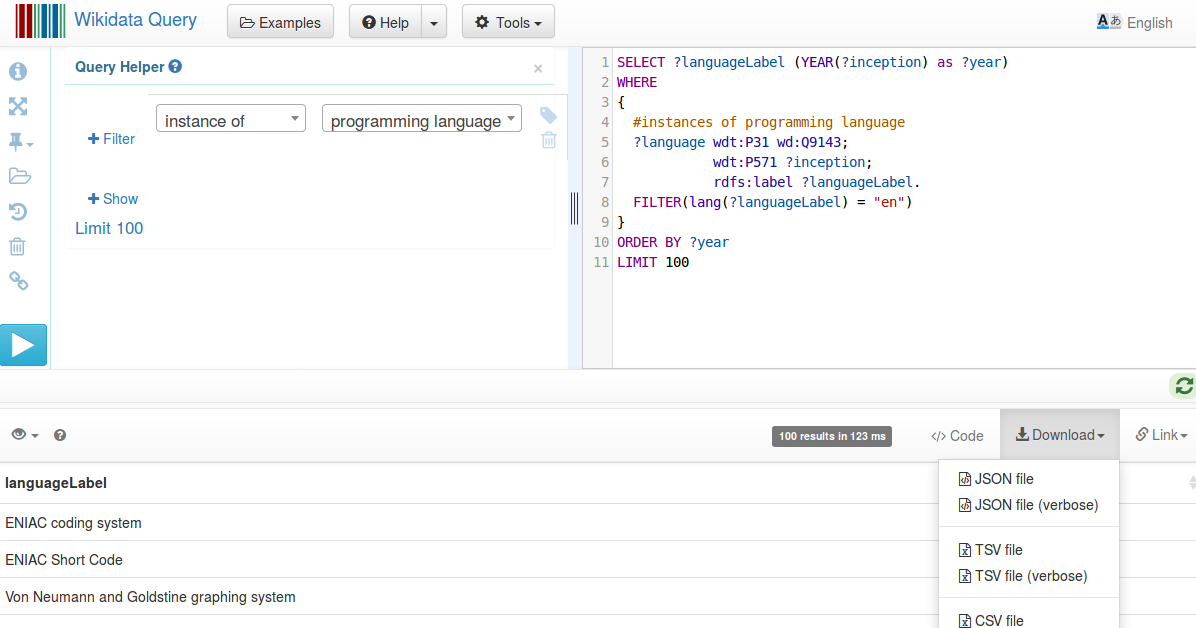

Le premier exercice consiste à obtenir les noms de tous les pays

In [ ]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?pays ?nom{
  ?pays wdt:P31 wd:Q6256;
        rdfs:label ?nom.
  FILTER(lang(?nom) = "fr")
}
ORDER by ?nom"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print(result["nom"]["value"])

Le prochain exercice consiste à obtenir les noms de tous les lycéees

In [ ]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?lycee ?nom{
  ?lycee wdt:P31 wd:Q2511322;
        wdt:P17 wd:Q142;
        rdfs:label ?nom.
  FILTER(lang(?nom) = "fr")
}
ORDER by ?nom"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print(result["nom"]["value"])

Votre prochain exercice consiste à trouver les informations suivantes en utilisant Wikidata.
1. Trouvez toutes les régions de France.
2. Trouvez les universités en France.
3. Trouvez les parcs dans votre ville en France.

L'exercice suivant consiste à trouver tous les films de la France

In [ ]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?film ?nom ?year{
  ?film wdt:P31 wd:Q11424;
        wdt:P495 wd:Q142;
        wdt:P577 ?date;
        rdfs:label ?nom.
  FILTER(lang(?nom) = "fr" && !wikibase:isSomeValue(?date) )
  BIND(year(?date) as ?year)
}
ORDER by ?year"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print(result["nom"]["value"], result["year"]["value"])

L'exercice suivant consiste à trouver tous les films de la France depuis 2015.

In [ ]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?film ?nom ?year{
  ?film wdt:P31 wd:Q11424;
        wdt:P495 wd:Q142;
        wdt:P577 ?date;
        rdfs:label ?nom.
  FILTER(lang(?nom) = "fr" && !wikibase:isSomeValue(?date) )
  BIND(year(?date) as ?year).
  FILTER (?year >= 2015)
}
ORDER by ?year"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print(result["nom"]["value"], result["year"]["value"])

L'exercice suivant consiste à trouver le nombre de tous les films français sortis chaque année.

In [ ]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?year (count(?film) as ?count){
  ?film wdt:P31 wd:Q11424;
        wdt:P495 wd:Q142;
        wdt:P577 ?date;
        rdfs:label ?nom.
  FILTER(lang(?nom) = "fr" && !wikibase:isSomeValue(?date) )
  BIND(year(?date) as ?year)
}
GROUP by ?year
ORDER by ?year"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

year = []
count = []
for result in results["results"]["bindings"]:
    year.append(result["year"]["value"])
    count.append(int(result["count"]["value"]))
    print(result["year"]["value"], result["count"]["value"])

Ensuite, nous allons visualiser le décompte de tous les films français sortis chaque année.

In [ ]:
import matplotlib.pyplot as plot

plot.figure(figsize=(20,20))
plot.bar(x=year,height=count)
plot.show()

L'exercice suivant consiste à trouver et visualiser le nombre de tous les films français sortis chaque année.

In [ ]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON
import matplotlib.pyplot as plot

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?year (count(?film) as ?count){
  ?film wdt:P31 wd:Q7366;
        wdt:P495 wd:Q142;
        wdt:P577 ?date;
        rdfs:label ?nom.
  FILTER(lang(?nom) = "fr" && !wikibase:isSomeValue(?date) )
  BIND(year(?date) as ?year)
}
GROUP by ?year
ORDER by ?year"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

year = []
count = []
for result in results["results"]["bindings"]:
    year.append(result["year"]["value"])
    count.append(int(result["count"]["value"]))
    

plot.figure(figsize=(20,20))
plot.bar(x=year,height=count)
plot.show()